**Praditya Irgy**

Tegal, Jawa Tengah

*www.dicoding.com/users/pradityairgy*

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-16 01:27:45--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.82MB/s    in 38s     

2021-07-16 01:28:24 (8.06 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import os

base_dir = '/tmp/rockpaperscissors'
os.chdir(base_dir)
print(os.getcwd())

/tmp/rockpaperscissors


In [ ]:
os.mkdir('train')
os.mkdir('val')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
import shutil

def split(dir):
  val_path = f'val/{dir}'
  file = os.listdir(dir)
  porsi_val = len(file)*0.4

  os.mkdir(val_path)  
  for i in range(int(porsi_val)):
    shutil.move(f'{dir}/{file[i]}', val_path) 

  shutil.move(dir, 'train')

split('paper')
split('rock')
split('scissors')

In [ ]:
root = 'train'
path = f'train/{os.listdir(root)[1]}'
print(path)

train/scissors


In [ ]:
from PIL import Image

def grayscale(root):
  for i in range(0, 3):
    path = f'{root}/{os.listdir(root)[i]}'

    for j in range(len(os.listdir(path))):
      filename = os.listdir(path)[j]
      img = Image.open(f'{path}/{filename}').convert('LA')
      img.save(f'{path}/{filename}')

grayscale('train')
grayscale('val')

Disini saya ubah semua gambar yang ada di *dataset* karena saya pikir model juga akan mempertimbangkan warna pada gambar saat memprediksi *input*. Jadi saya ubah warna menjadi hitam putih agar model punya lebih sedikit hal yang perlu dijadikan faktor saat memprediksi *input*. Tentunya saya juga akan mengubah warna dari gambar *input* menjadi hitam putih.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
     
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.2, 2.0],
    rotation_range=120,
    height_shift_range=0.4,
    width_shift_range=0.4,
    horizontal_flip=True,
    shear_range = 0.2,
    zoom_range=0.4,
    fill_mode = 'nearest'
)
     
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=120,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='categorical')
     
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(3,3),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(3,3),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      epochs=100,
      steps_per_epoch=42,
      batch_size=8,
      validation_steps=28,
      validation_data=validation_generator,
      verbose=2)

Epoch 1/100
42/42 - 47s - loss: 1.1060 - accuracy: 0.3196 - val_loss: 1.0979 - val_accuracy: 0.3432
Epoch 2/100
42/42 - 15s - loss: 1.0988 - accuracy: 0.3326 - val_loss: 1.0980 - val_accuracy: 0.4268
Epoch 3/100
42/42 - 15s - loss: 1.0990 - accuracy: 0.3425 - val_loss: 1.0980 - val_accuracy: 0.3444
Epoch 4/100
42/42 - 15s - loss: 1.0974 - accuracy: 0.3234 - val_loss: 1.0940 - val_accuracy: 0.3238
Epoch 5/100
42/42 - 15s - loss: 1.0910 - accuracy: 0.3714 - val_loss: 1.0631 - val_accuracy: 0.5263
Epoch 6/100
42/42 - 15s - loss: 1.0411 - accuracy: 0.4635 - val_loss: 1.0743 - val_accuracy: 0.4600
Epoch 7/100
42/42 - 15s - loss: 0.9346 - accuracy: 0.6005 - val_loss: 1.0016 - val_accuracy: 0.4714
Epoch 8/100
42/42 - 14s - loss: 0.8176 - accuracy: 0.6476 - val_loss: 0.9144 - val_accuracy: 0.5892
Epoch 9/100
42/42 - 14s - loss: 0.7857 - accuracy: 0.6393 - val_loss: 1.1197 - val_accuracy: 0.4085
Epoch 10/100
42/42 - 14s - loss: 0.7442 - accuracy: 0.6788 - val_loss: 1.1123 - val_accuracy: 0.4439

In [ ]:
print(validation_generator.class_indices)
model.evaluate(validation_generator)

{'paper': 0, 'rock': 1, 'scissors': 2}
28/28 [==============================] - 5s 188ms/step - loss: 0.0631 - accuracy: 0.9805


[0.06310050934553146, 0.9805492162704468]

Saving scissors(2).jpg to scissors(2) (3).jpg
scissors(2).jpg
[[0.0000000e+00 9.9999785e-01 2.1668366e-06]]
scissors


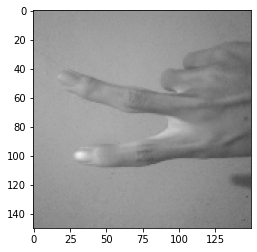

In [ ]:
    import numpy as np
    from google.colab import files
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline
     
    uploaded = files.upload()
     
    for fn in uploaded.keys():
     
      # predicting images
      path = fn
      img = image.load_img(path, target_size=(150,150,3)).convert('LA').convert('RGB')
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
     
      images = np.vstack([x])
      classes = model.predict(images)
      
      print(fn)
      print(classes)
      if classes[0][0] == 1:
        print('paper')
        
      elif classes[0][1] == 1:
        print('rock')

      else:
        print('scissors')